In [1]:
import pandas as pd

In [2]:
data = pd.read_feather("private/stays_df_for_fitting.feather")

# Additional data cleaning for ICU stays
data.loc[data.ICUAdmission < data.Start, "ICUAdmission"] = data.loc[data.ICUAdmission < data.Start, "Start"]

# Remove ICU stays that end before the start date
# E.g. patient discharged from ICU before contracting the disease while in the hospital
data.loc[data.ICUDischarge < data.Start, ["ICUAdmission", "ICUDischarge"]] = pd.NaT

data.head()

,Age,Admission,Discharge,ICUAdmission,ICUDischarge,Readmission,ReadmissionDischarge,FirstPosCollected,Acquisition,Summary,Start
3629,3,2024-08-01 00:12:00,2024-08-01 21:55:51.424,NaT,NaT,NaT,NaT,2024-08-01 01:19:24.672,Community-Onset Community-Associated,Discharged,2024-08-01 00:12:00
3630,87,2024-08-04 15:26:00,2024-08-23 16:02:03.904,NaT,NaT,NaT,NaT,2024-08-04 15:34:34.240,Community-Onset Community-Associated,IP Transfer,2024-08-04 15:26:00
3631,88,2024-08-13 04:04:00,2024-08-26 18:09:46.496,NaT,NaT,NaT,NaT,2024-08-13 05:12:48.896,Community-Onset Community-Associated,Discharged,2024-08-13 04:04:00
3632,52,2024-08-20 03:41:00,2024-08-22 16:33:02.464,NaT,NaT,NaT,NaT,2024-08-20 03:53:36.512,Community-Onset Community-Associated,Discharged,2024-08-20 03:41:00
3633,62,2024-08-26 08:13:00,2024-08-27 05:18:14.528,NaT,NaT,NaT,NaT,2024-08-27 05:18:14.528,Community-Onset Community-Associated,Discharged,2024-08-26 08:13:00


In [3]:
from pprint import pprint


los_mappings = {('gim', 'survived', '0-15'): 1, ('gim', 'died', '0-15'): 4, ('gim', 'survived', '16-64'): 2, ('gim', 'died', '16-64'): 4, ('gim', 'survived', '65+'): 3, ('gim', 'died', '65+'): 4, ('icu', 'survived', '0+'): 1, ('icu', 'died', '0+'): 1}
pprint(los_mappings)

{('gim', 'died', '0-15'): 4,
 ('gim', 'died', '16-64'): 4,
 ('gim', 'died', '65+'): 4,
 ('gim', 'survived', '0-15'): 1,
 ('gim', 'survived', '16-64'): 2,
 ('gim', 'survived', '65+'): 3,
 ('icu', 'died', '0+'): 1,
 ('icu', 'survived', '0+'): 1}


In [4]:
label_to_keys_gim = {}
label_to_keys_icu = {}
for key, label in los_mappings.items():
    if key[0] == "gim":
        label_to_keys_gim.setdefault(label, []).append(key)
    else:
        label_to_keys_icu.setdefault(label, []).append(key)

In [5]:
pprint(label_to_keys_gim)

{1: [('gim', 'survived', '0-15')],
 2: [('gim', 'survived', '16-64')],
 3: [('gim', 'survived', '65+')],
 4: [('gim', 'died', '0-15'), ('gim', 'died', '16-64'), ('gim', 'died', '65+')]}


In [6]:
pprint(label_to_keys_icu)

{1: [('icu', 'survived', '0+'), ('icu', 'died', '0+')]}


In [7]:
data.query("ICUAdmission.isnull() and Summary.str.lower() in ['dead', 'deceased'] and Age >= 16 and Age < 65")

,Age,Admission,Discharge,ICUAdmission,ICUDischarge,Readmission,ReadmissionDischarge,FirstPosCollected,Acquisition,Summary,Start
3657,44,2024-10-18 06:53:00,2024-11-08 12:39:15.712,NaT,NaT,NaT,NaT,2024-10-22 20:07:12.640,Hospital-Onset Healthcare-Associated,Dead,2024-10-22 20:07:12.640
3916,38,2024-12-19 23:10:00,2024-12-20 09:34:33.984,NaT,NaT,NaT,NaT,2024-12-20 01:44:53.504,Community-Onset Community-Associated,Dead,2024-12-19 23:10:00.000
4222,63,2024-12-30 14:06:00,2025-01-04 08:38:26.048,NaT,NaT,NaT,NaT,2025-01-03 12:54:25.024,Hospital-Onset Healthcare-Associated,Dead,2025-01-03 12:54:25.024
4354,61,2025-01-14 12:22:00,2025-01-18 03:00:53.376,NaT,NaT,NaT,NaT,2025-01-14 13:18:29.888,Community-Onset Community-Associated,Dead,2025-01-14 12:22:00.000
4358,62,2025-01-11 13:50:00,2025-01-30 16:59:24.544,NaT,NaT,NaT,NaT,2025-01-15 06:20:51.584,Hospital-Onset Healthcare-Associated,Dead,2025-01-15 06:20:51.584


In [8]:
data.query("ICUAdmission.notnull() and Summary.str.lower() not in ['dead', 'deceased'] and Age >= 16 and Age < 65")

,Age,Admission,Discharge,ICUAdmission,ICUDischarge,Readmission,ReadmissionDischarge,FirstPosCollected,Acquisition,Summary,Start
3664,16,2024-10-30 18:16:00,2024-11-06 11:58:32.448,2024-10-31 01:09:54.304,2024-11-03 17:03:22.112,NaT,NaT,2024-10-31 01:12:05.376,Community-Onset Community-Associated,Discharged,2024-10-30 18:16:00.000
3750,61,2024-11-28 19:06:00,2024-12-24 19:00:58.496,2024-11-29 01:13:48.800,2024-12-20 21:52:56.320,NaT,NaT,2024-11-28 19:35:12.640,Community-Onset Suspected Healthcare-Associated,Discharged,2024-11-28 19:06:00.000
3809,53,2024-12-07 21:19:00,2024-12-21 20:57:55.968,2024-12-10 00:14:52.928,2024-12-18 21:23:08.416,NaT,NaT,2024-12-07 21:31:49.632,Community-Onset Community-Associated,Discharged,2024-12-07 21:19:00.000
3874,62,2024-12-05 15:48:00,2025-01-08 14:17:39.072,2024-12-16 19:56:32.640,2024-12-20 21:26:43.456,NaT,NaT,2024-12-16 19:56:32.640,Hospital-Onset Healthcare-Associated,IP Transfer,2024-12-16 19:56:32.640
3989,32,2024-12-23 13:02:00,2025-01-12 16:00:56.320,2024-12-24 15:02:51.648,2025-01-01 10:52:52.096,NaT,NaT,2024-12-24 15:09:24.864,Community-Onset Community-Associated,Discharged,2024-12-23 13:02:00.000
4069,60,2024-12-25 17:00:00,2025-02-06 17:33:47.904,2024-12-27 20:55:34.656,2025-01-03 18:35:12.256,NaT,NaT,2024-12-27 20:55:34.656,Hospital-Onset Healthcare-Associated,Discharged,2024-12-27 20:55:34.656
4078,63,2024-12-28 05:39:00,2025-03-05 11:29:18.336,2024-12-29 14:28:07.808,2025-01-04 02:40:10.240,NaT,NaT,2024-12-28 06:14:49.088,Community-Onset Suspected Healthcare-Associated,IP Transfer,2024-12-28 05:39:00.000
4112,53,2024-12-29 10:45:00,2025-01-08 11:49:06.176,2024-12-30 11:19:52.064,2025-01-01 16:40:12.544,NaT,NaT,2024-12-29 12:27:58.848,Community-Onset Community-Associated,Discharged,2024-12-29 10:45:00.000
4162,47,2024-12-31 12:00:00,2025-01-06 13:39:06.880,2024-12-31 15:39:26.080,2025-01-03 23:17:00.544,NaT,NaT,2024-12-31 12:51:13.536,Community-Onset Community-Associated,Discharged,2024-12-31 12:00:00.000
4213,39,2025-01-02 19:35:00,2025-02-12 16:58:40.512,2025-01-17 01:05:30.112,2025-01-22 12:44:46.464,NaT,NaT,2025-01-03 01:45:56.992,Community-Onset Community-Associated,Discharged,2025-01-02 19:35:00.000


In [9]:
def query_str(los_tuple):
    ward, outcome, age_group = los_tuple
    conditions = []

    # GIM/ICU
    if ward == "icu":
        conditions.append("ICUAdmission.notnull()")
    else:
        conditions.append("ICUAdmission.isnull()")

    # Outcome
    if outcome == "died":
        conditions.append("Summary.str.lower() in ['dead', 'deceased']")
    else:
        conditions.append("Summary.str.lower() not in ['dead', 'deceased']")
    
    # Age group
    if age_group.endswith("+"):
        age_limit = int(age_group[:-1])
        conditions.append(f"Age >= {age_limit}")
    else:
        age_min, age_max = age_group.split("-")
        # age_min, age_max should be strings representing integers
        conditions.append(f"Age >= {int(age_min)} and Age < {int(age_max) + 1}")
    return " and ".join(conditions)

# Examples
print(query_str(('gim', 'died', '16-64')))
print(query_str(('icu', 'survived', '0+')))

ICUAdmission.isnull() and Summary.str.lower() in ['dead', 'deceased'] and Age >= 16 and Age < 65
ICUAdmission.notnull() and Summary.str.lower() not in ['dead', 'deceased'] and Age >= 0


In [10]:
# Example of combining the query strings for multiple los_tuples
data.query("""\
(ICUAdmission.notnull() and Summary.str.lower() not in ['dead', 'deceased'] and Age >= 0) or \
(ICUAdmission.notnull() and Summary.str.lower() in ['dead', 'deceased'] and Age >= 0)
""")

,Age,Admission,Discharge,ICUAdmission,ICUDischarge,Readmission,ReadmissionDischarge,FirstPosCollected,Acquisition,Summary,Start
3649,76,2024-10-07 05:09:00,2024-10-13 16:30:06.336,2024-10-07 12:19:03.296,2024-10-11 23:34:41.408,NaT,NaT,2024-10-07 05:34:54.976,Community-Onset Community-Associated,Dead,2024-10-07 05:09:00.000
3664,16,2024-10-30 18:16:00,2024-11-06 11:58:32.448,2024-10-31 01:09:54.304,2024-11-03 17:03:22.112,NaT,NaT,2024-10-31 01:12:05.376,Community-Onset Community-Associated,Discharged,2024-10-30 18:16:00.000
3667,6,2024-11-02 08:10:00,2024-11-04 21:29:29.344,2024-11-03 18:02:21.056,2024-11-04 21:29:29.344,NaT,NaT,2024-11-03 18:02:21.056,Inpatient Transfer,IP Transfer,2024-11-03 18:02:21.056
3675,47,2024-11-13 20:39:00,2024-11-25 16:00:07.168,2024-11-24 21:19:27.232,2024-11-25 16:00:07.168,NaT,NaT,2024-11-14 09:57:26.144,Community-Onset Community-Associated,Dead,2024-11-13 20:39:00.000
3677,70,2024-11-09 17:46:00,2024-12-23 17:44:54.528,2024-11-15 12:29:57.632,2024-12-23 17:44:54.528,NaT,NaT,2024-11-15 10:36:21.888,Hospital-Onset Healthcare-Associated,IP Transfer,2024-11-15 10:36:21.888
...,...,...,...,...,...,...,...,...,...,...,...
4645,32,2025-03-23 12:16:00,2025-04-01 18:59:38.624,2025-03-23 14:30:06.592,2025-03-24 15:30:53.056,NaT,NaT,2025-03-23 15:09:25.888,Community-Onset Community-Associated,Discharged,2025-03-23 12:16:00.000
4654,2,2025-03-25 17:45:00,2025-04-01 17:41:00.032,2025-03-26 19:41:19.232,2025-03-28 21:45:03.232,NaT,NaT,2025-03-26 19:41:19.232,Inpatient Transfer,Discharged,2025-03-26 19:41:19.232
4661,0,2025-03-28 11:45:00,2025-04-05 16:55:44.384,2025-03-28 21:01:21.792,2025-04-04 16:29:55.072,NaT,NaT,2025-03-28 21:01:21.792,Inpatient Transfer,Discharged,2025-03-28 21:01:21.792
4665,12,2025-03-30 18:33:00,2025-04-01 19:23:40.416,2025-03-31 06:02:20.544,2025-03-31 19:41:32.544,NaT,NaT,2025-03-30 18:51:41.440,Community-Onset Community-Associated,Discharged,2025-03-30 18:33:00.000


In [11]:
def query_str_multiple(los_tuples):
    query_parts = [f"({query_str(los_tuple)})" for los_tuple in los_tuples]
    return " or ".join(query_parts)

In [12]:
query_strs_gim = {k: query_str_multiple(v) for k, v in label_to_keys_gim.items()}
pprint(query_strs_gim)

{1: "(ICUAdmission.isnull() and Summary.str.lower() not in ['dead', "
    "'deceased'] and Age >= 0 and Age < 16)",
 2: "(ICUAdmission.isnull() and Summary.str.lower() not in ['dead', "
    "'deceased'] and Age >= 16 and Age < 65)",
 3: "(ICUAdmission.isnull() and Summary.str.lower() not in ['dead', "
    "'deceased'] and Age >= 65)",
 4: "(ICUAdmission.isnull() and Summary.str.lower() in ['dead', 'deceased'] "
    'and Age >= 0 and Age < 16) or (ICUAdmission.isnull() and '
    "Summary.str.lower() in ['dead', 'deceased'] and Age >= 16 and Age < 65) "
    "or (ICUAdmission.isnull() and Summary.str.lower() in ['dead', 'deceased'] "
    'and Age >= 65)'}


In [13]:
query_strs_icu = {k: query_str_multiple(v) for k, v in label_to_keys_icu.items()}
pprint(query_strs_icu)

{1: "(ICUAdmission.notnull() and Summary.str.lower() not in ['dead', "
    "'deceased'] and Age >= 0) or (ICUAdmission.notnull() and "
    "Summary.str.lower() in ['dead', 'deceased'] and Age >= 0)"}


In [14]:
dfs_gim = {k: data.query(qs) for k, qs in query_strs_gim.items()}
dfs_icu = {k: data.query(qs) for k, qs in query_strs_icu.items()}

In [15]:
{k: len(df) for k, df in dfs_gim.items()}

{1: 151, 4: 38, 2: 398, 3: 417}

In [16]:
{k: len(df) for k, df in dfs_icu.items()}

{1: 66}

In [17]:
dfs_gim[1].head()

,Age,Admission,Discharge,ICUAdmission,ICUDischarge,Readmission,ReadmissionDischarge,FirstPosCollected,Acquisition,Summary,Start
3629,3,2024-08-01 00:12:00,2024-08-01 21:55:51.424,NaT,NaT,NaT,NaT,2024-08-01 01:19:24.672,Community-Onset Community-Associated,Discharged,2024-08-01 00:12:00
3644,3,2024-10-05 08:34:00,2024-10-05 14:41:50.080,NaT,NaT,2024-10-07 09:57:03.616,2024-10-09 12:57:35.488,2024-10-05 08:47:56.416,Community-Onset Community-Associated,Discharged,2024-10-05 08:34:00
3647,1,2024-10-06 20:13:00,2024-10-07 19:18:29.120,NaT,NaT,NaT,NaT,2024-10-06 20:13:29.472,Community-Onset Community-Associated,Discharged,2024-10-06 20:13:00
3654,11,2024-10-12 21:31:00,2024-10-13 19:22:41.024,NaT,NaT,NaT,NaT,2024-10-13 02:05:01.824,Community-Onset Community-Associated,Discharged,2024-10-12 21:31:00
3656,0,2024-10-22 12:44:00,2024-10-25 12:31:39.008,NaT,NaT,NaT,NaT,2024-10-22 13:27:26.464,Community-Onset Community-Associated,Discharged,2024-10-22 12:44:00


In [18]:
dfs_gim[3].loc[dfs_gim[3].Discharge <= dfs_gim[3].Start]

,Age,Admission,Discharge,ICUAdmission,ICUDischarge,Readmission,ReadmissionDischarge,FirstPosCollected,Acquisition,Summary,Start
4250,95,2025-01-01 04:09:00,2025-01-05 18:12:34.432,NaT,NaT,NaT,NaT,2025-01-05 18:12:34.432,Hospital-Onset Healthcare-Associated,Discharged,2025-01-05 18:12:34.432


In [19]:
def los_gim(df):
    return (df.Discharge - df.Start) / pd.Timedelta(days=1)

def los_pre_icu(df):
    return (df.ICUAdmission - df.Start) / pd.Timedelta(days=1)

def los_icu(df):
    return (df.ICUDischarge - df.ICUAdmission) / pd.Timedelta(days=1)

def los_post_icu(df):
    return (df.Discharge - df.ICUDischarge) / pd.Timedelta(days=1)

In [20]:
[
    (los_pre_icu(dfs_icu[1]) == 0).sum(),
    (los_pre_icu(dfs_icu[1]) == 0).mean()
]

[np.int64(31), np.float64(0.4696969696969697)]

In [21]:
[
    (los_post_icu(dfs_icu[1]) == 0).sum(),
    (los_post_icu(dfs_icu[1]) == 0).mean()
]

[np.int64(22), np.float64(0.3333333333333333)]

In [22]:
los_tmp = los_pre_icu(dfs_icu[1])
(los_tmp[los_tmp != 0]).describe()

count    35.000000
mean      1.418207
std       3.067309
min       0.078886
25%       0.237549
50%       0.475927
75%       0.969319
max      14.229515
dtype: float64

In [23]:
los_icu(dfs_icu[1]).describe()

count    66.000000
mean     11.356884
std      17.996250
min       0.189630
25%       2.636990
50%       5.664616
75%      12.212907
max      98.569481
dtype: float64

In [24]:
los_tmp = los_post_icu(dfs_icu[1])
(los_tmp[los_tmp != 0]).describe()

count    44.000000
mean     11.476075
std      14.102650
min       0.987591
25%       2.980978
50%       5.622139
75%      14.559004
max      60.367455
dtype: float64

In [25]:
import reliability

Results from Fit_Everything:
Analysis method: MLE
Failures / Right censored: 151/0 (0% right censored) 

   Distribution    Alpha     Beta     Gamma  Alpha 1   Beta 1 Alpha 2   Beta 2 Proportion 1 DS        Mu   Sigma   Lambda Log-likelihood    AICc     BIC      AD optimizer
   Lognormal_3P                   0.0365464                                                    -0.981489 1.54499                -131.743 269.649 278.537  1.6109       TNC
 Loglogistic_3P 0.354238  1.07993 0.0398348                                                                                     -133.549 273.261  282.15 1.85387       TNC
   Lognormal_2P                                                                                 -0.78164 1.33594                -139.967 284.016 289.969 2.79546       TNC
 Loglogistic_2P 0.419784  1.27262                                                                                               -143.513 291.107  297.06 3.03528       TNC
     Weibull_3P 0.803184 0.628223 0.0399

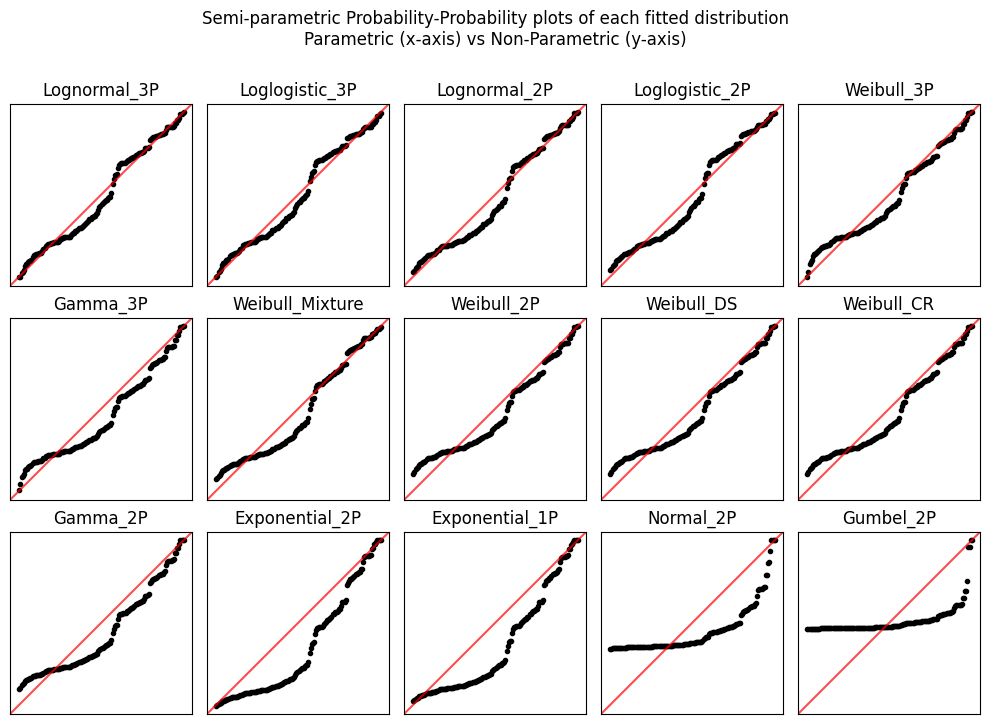

In [26]:
result = reliability.Fitters.Fit_Everything(
    los_gim(dfs_gim[1]).to_numpy(),
    show_histogram_plot=False,
    show_probability_plot=False,
    show_best_distribution_probability_plot=False,
    print_results=True,
    show_PP_plot=True
)

Results from Fit_Everything:
Analysis method: MLE
Failures / Right censored: 398/0 (0% right censored) 

   Distribution   Alpha     Beta     Gamma Alpha 1   Beta 1 Alpha 2   Beta 2 Proportion 1 DS       Mu   Sigma   Lambda Log-likelihood    AICc     BIC      AD optimizer
   Lognormal_3P                   0.054458                                                   0.494071 1.45296                -910.073 1826.21  1838.1 2.16579       TNC
   Lognormal_2P                                                                              0.571193 1.36181                -914.981 1833.99 1841.94 2.70865       TNC
 Loglogistic_3P  1.6126  1.16056 0.0656694                                                                                   -916.253 1838.57 1850.47  2.8801       TNC
 Loglogistic_2P 1.72346  1.25043                                                                                             -924.444 1852.92 1860.86 3.48735       TNC
     Weibull_3P 3.35056 0.685215 0.0666578             

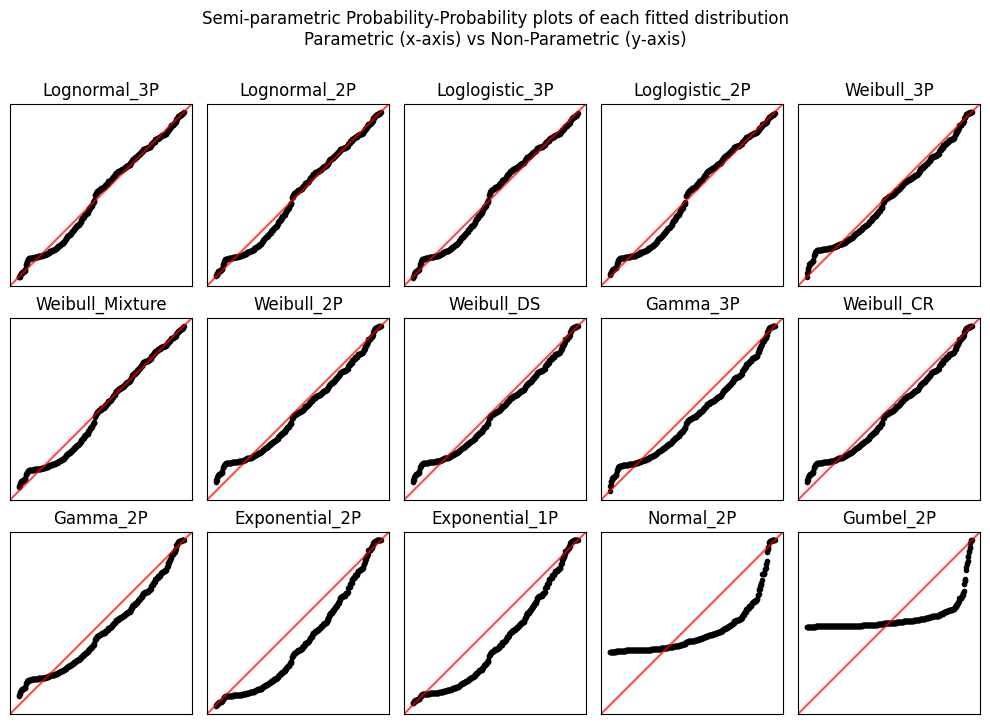

In [27]:
result = reliability.Fitters.Fit_Everything(
    los_gim(dfs_gim[2]).to_numpy(),
    show_histogram_plot=False,
    show_probability_plot=False,
    show_best_distribution_probability_plot=False,
    print_results=True,
    show_PP_plot=True
)

Results from Fit_Everything:
Analysis method: MLE
Failures / Right censored: 416/0 (0% right censored) 

   Distribution   Alpha     Beta     Gamma Alpha 1   Beta 1 Alpha 2   Beta 2 Proportion 1 DS      Mu   Sigma    Lambda Log-likelihood    AICc     BIC       AD optimizer
     Weibull_3P 9.46483 0.886069 0.0787859                                                                                   -1371.25 2748.57  2760.6 0.815685       TNC
       Gamma_3P 11.9048 0.846043 0.0787859                                                                                   -1372.81 2751.68 2763.71  1.03233       TNC
 Exponential_2P                  0.0787859                                                                   0.0992855       -1376.86 2757.75 2765.78  2.65584       TNC
     Weibull_2P 9.69027 0.912851                                                                                             -1376.91 2757.84 2765.88 0.984247       TNC
 Exponential_1P                                   

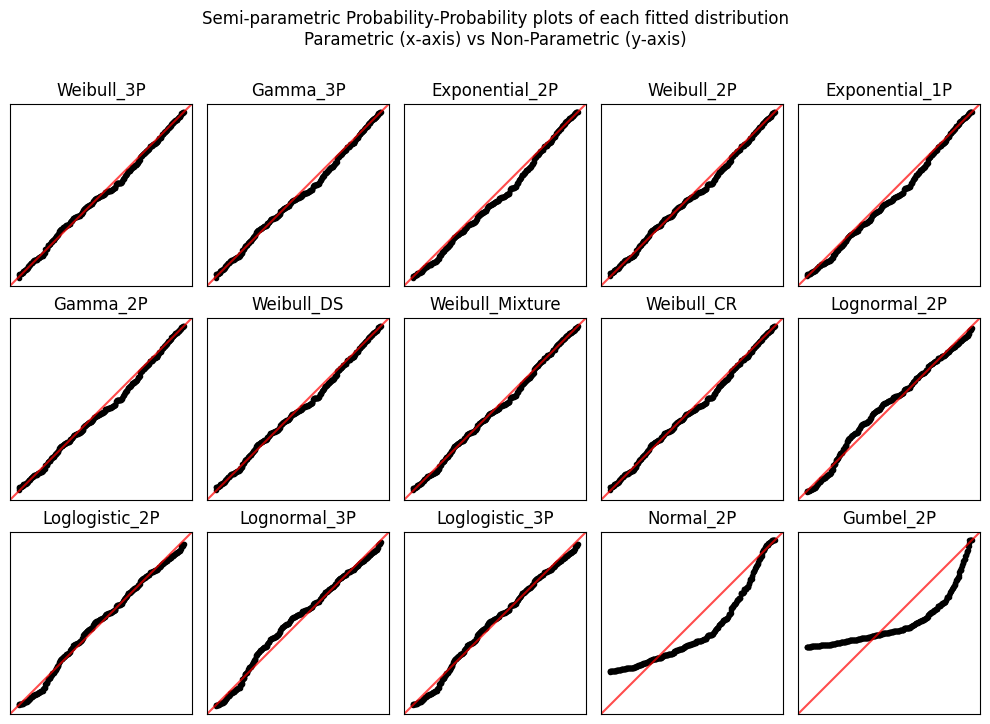

In [28]:
result = reliability.Fitters.Fit_Everything(
    los_gim(dfs_gim[3]).to_numpy(),
    show_histogram_plot=False,
    show_probability_plot=False,
    show_best_distribution_probability_plot=False,
    print_results=True,
    show_PP_plot=True
)

Results from Fit_Everything:
Analysis method: MLE
Failures / Right censored: 38/0 (0% right censored) 

   Distribution   Alpha     Beta    Gamma Alpha 1   Beta 1 Alpha 2   Beta 2 Proportion 1 DS      Mu   Sigma    Lambda Log-likelihood    AICc     BIC       AD optimizer
 Loglogistic_2P 6.45843  1.47643                                                                                            -130.463  265.27 268.202 0.590285       TNC
   Lognormal_2P                                                                              1.8238 1.21745                 -130.701 265.745 268.677 0.701195       TNC
     Weibull_3P  10.116 0.761307 0.263864                                                                                   -129.199 265.104 269.311  1.05518       TNC
       Gamma_3P 18.3839 0.646919 0.263864                                                                                   -129.232 265.171 269.378  1.12784       TNC
 Exponential_1P                                         

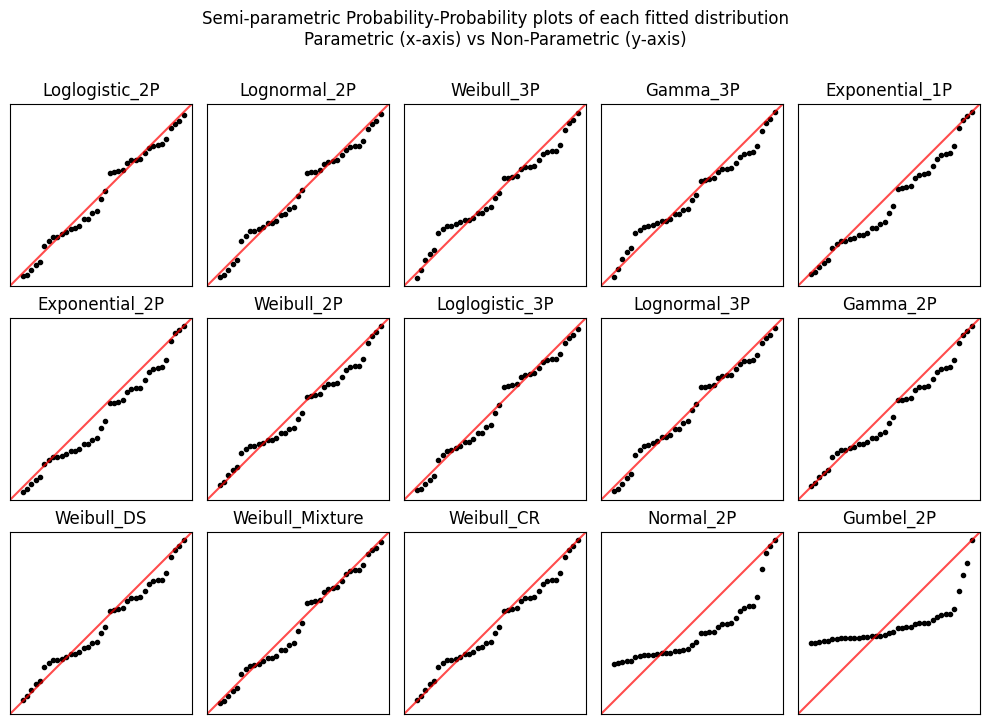

In [29]:
result = reliability.Fitters.Fit_Everything(
    los_gim(dfs_gim[4]).to_numpy(),
    show_histogram_plot=False,
    show_probability_plot=False,
    show_best_distribution_probability_plot=False,
    print_results=True,
    show_PP_plot=True
)

Results from Fit_Everything:
Analysis method: MLE
Failures / Right censored: 35/0 (0% right censored) 

   Distribution    Alpha     Beta     Gamma  Alpha 1   Beta 1 Alpha 2      Beta 2 Proportion 1 DS       Mu   Sigma   Lambda Log-likelihood    AICc     BIC       AD optimizer
 Loglogistic_3P 0.329893 0.996133 0.0787859                                                                                        -28.677 64.1283 68.0201 0.659724       TNC
     Weibull_CR                              1.18712 0.636083 14.2295 6.09278e+06                                                 -27.4046 64.1426 69.0307  2.77623       TNC
   Lognormal_3P                   0.0729469                                                       -1.06592 1.63009                -29.4581 65.6903 69.5822 0.739879       TNC
     Weibull_3P  0.74181 0.570162 0.0787859                                                                                       -30.3075 67.3892 71.2811  1.40234       TNC
 Loglogistic_2P 0.443762  

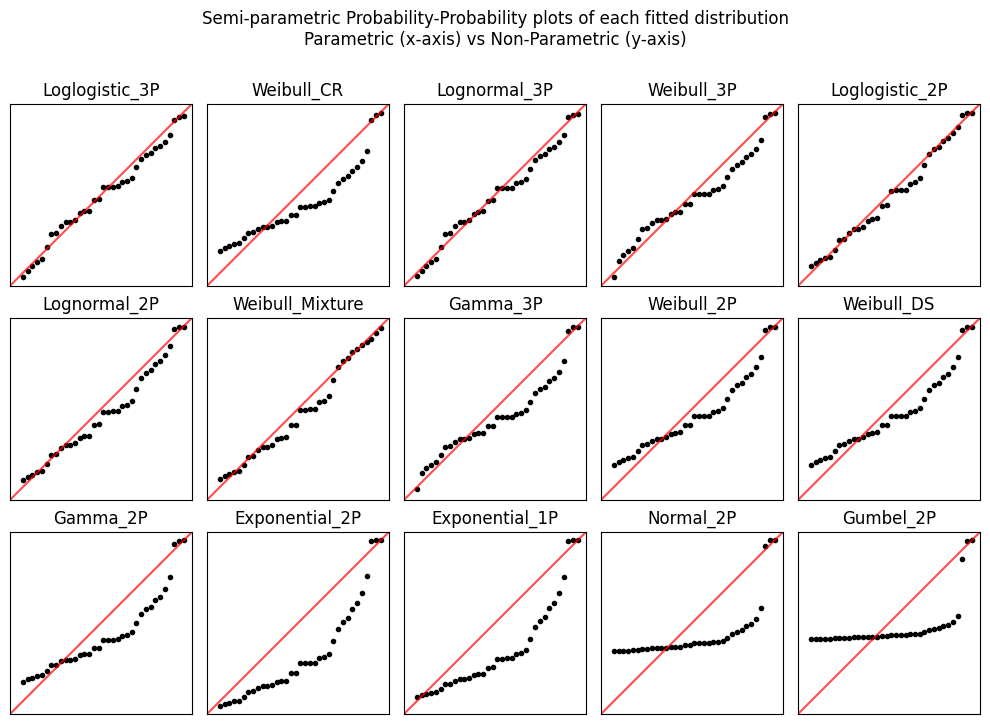

In [30]:
los_tmp = los_pre_icu(dfs_icu[1])
los_tmp = los_tmp[los_tmp != 0]

result = reliability.Fitters.Fit_Everything(
    los_tmp.to_numpy(),
    show_histogram_plot=False,
    show_probability_plot=False,
    show_best_distribution_probability_plot=False,
    print_results=True,
    show_PP_plot=True
)

Results from Fit_Everything:
Analysis method: MLE
Failures / Right censored: 66/0 (0% right censored) 

   Distribution   Alpha     Beta    Gamma Alpha 1   Beta 1 Alpha 2   Beta 2 Proportion 1 DS      Mu   Sigma    Lambda Log-likelihood    AICc     BIC       AD optimizer
   Lognormal_2P                                                                             1.67732 1.25493                  -219.34 442.871  447.06 0.421386       TNC
 Loglogistic_2P 5.46807  1.41393                                                                                            -219.489 443.169 447.358 0.342049       TNC
 Loglogistic_3P 5.29504  1.34597 0.117145                                                                                   -219.313 445.013 451.195 0.348133       TNC
   Lognormal_3P                         0                                                   1.67732 1.25493                  -219.34 445.067 451.249 0.421386       TNC
     Weibull_3P 9.27146 0.754625  0.18953               

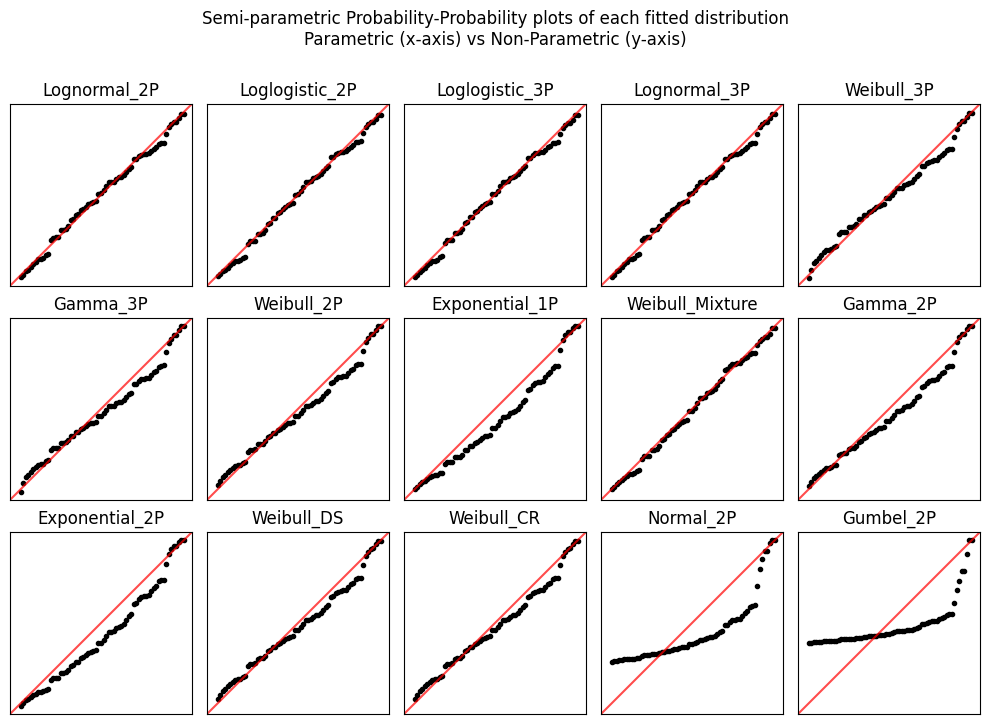

In [31]:
result = reliability.Fitters.Fit_Everything(
    los_icu(dfs_icu[1]).to_numpy(),
    show_histogram_plot=False,
    show_probability_plot=False,
    show_best_distribution_probability_plot=False,
    print_results=True,
    show_PP_plot=True
)

In [32]:
los_tmp = los_post_icu(dfs_icu[1])
los_tmp = los_tmp[los_tmp != 0]

result = reliability.Fitters.Fit_Everything(
    los_tmp.to_numpy(),
    show_histogram_plot=False,
    show_probability_plot=False,
    show_best_distribution_probability_plot=False,
    print_results=False,
    show_PP_plot=False
)

In [33]:
from base64 import b64encode
from io import BytesIO
from matplotlib import pyplot as plt
from matplotlib.figure import Figure

def fig_to_b64(fig: Figure) -> str:
    fig_out = BytesIO()
    fig.savefig(fig_out, format='png')
    base64encoded_img = b64encode(fig_out.getvalue()).decode('utf-8')
    return base64encoded_img

los_tmp = los_pre_icu(dfs_icu[1])
los_tmp = los_tmp[los_tmp != 0]

result = reliability.Fitters.Fit_Lognormal_3P(
    los_tmp.to_numpy(),
    show_probability_plot=True,
    print_results=False,
)

ax = result.probability_plot
ax.set_xlabel("Days elapsed")
ax.set_ylabel("Fraction of patients discharged")
fig_str = fig_to_b64(ax.figure)
plt.close()

len(fig_str)

104984


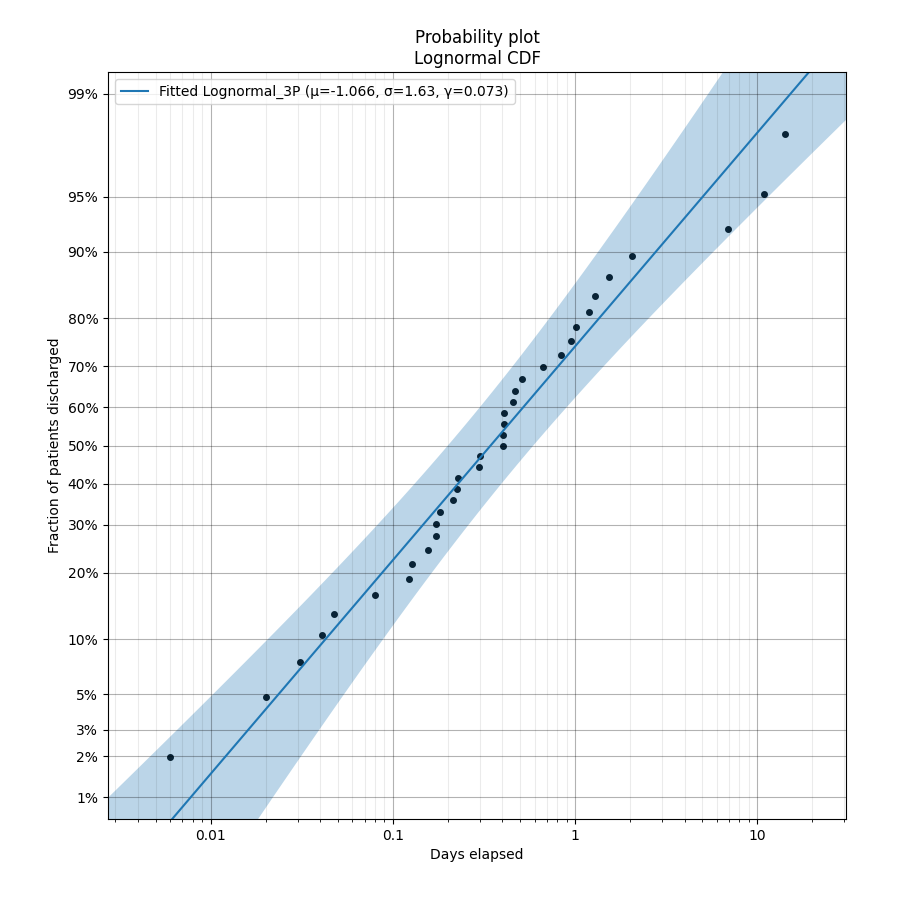

In [34]:
from IPython.display import display, HTML
display(HTML(f'<img src="data:image/png;base64,{fig_str}"/>')) 

In [35]:
dist = result.distribution

In [36]:
dist.param_title_long

'Lognormal Distribution (μ=-1.0659,σ=1.6301,γ=0.0729)'

In [37]:
display(dist.name)
display(dist.parameters)
display((dist.mean, los_gim(dfs_gim[1]).mean()))
display((dist.standard_deviation, los_gim(dfs_gim[1]).std()))
display((dist.median, los_gim(dfs_gim[1]).median()))

'Lognormal'

array([-1.06591689,  1.63009275,  0.07294686])

(1.3733629848914481, np.float64(1.2996662840323767))

(np.float64(4.734720185736295), np.float64(3.1499266657081924))

(np.float64(0.41735878605078786), np.float64(0.33822296296296295))